# Analyzing Employee Exit Surveys

This project looks at exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The data source for TAFE is found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). The data source for DETE is found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The main focus is answering the following two questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Exploring the Data

In [17]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print('dete_survey')
print(dete_survey.info())
print(dete_survey.head())

dete_survey
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector    

In [18]:
print('tafe_survey')
print(tafe_survey.info())
print(tafe_survey.head())

tafe_survey
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                      

We can note the following from above:
- The dete_survey dataset has 'Not Stated' values that are essentially NaN values. 
- There are also many columns that we don't need to complete our analysis.
- Columns are similar but different names across the two datasets.
- There are also multiple columns that indicate resignation reasons due to dissatisfaction.

## Correcting Missing Values and Dropping Unnecessary Columns

In [19]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We corrected NaN to the standard noted above ('Not Stated'). We also dropped multiple columns that would not have contributed to the analysis.

Below, we will fix column names.

In [20]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

tafe_survey_updated.rename(columns = {'Record ID': 'id',
                                      'CESSATION YEAR': 'cease_date',
                                      'Reason for ceasing employment': 'separationtype',
                                      'Gender. What is your Gender?': 'gender',
                                      'CurrentAge. Current Age': 'age',
                                      'Employment Type. Employment Type': 'employment_status',
                                      'Classification. Classification': 'position',
                                      'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                      'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                                     }, inplace=True)

print('dete_survey')
print(dete_survey_updated.head())

dete_survey
   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1 

In [21]:
print('tafe_survey')
print(tafe_survey_updated.head())

tafe_survey
             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                               

We want to eventually combine the columns, so column standardization is necessary and thus we applied general updates as well as dictionary replacements.

## Filtering the Data

We are looking specifically at 'separationtype' to answer this question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Thus, we should look at filtering out data that does not help us answer that. Let's look at the remaining columns and their counts.

In [22]:
print('dete_survey')
print('--------------------\n')
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print('tafe_survey')
print('--------------------\n')
print(tafe_survey_updated['separationtype'].value_counts())

dete_survey
--------------------

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


tafe_survey
--------------------

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


From the above, we should filter out relevant columns for employees who have resigned.

In [23]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | 
                   (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | 
                  (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## Verifying the Data

We should look at the cease_date column in order to ensure that the data makes sense. For example, dates after today (2021) do not make sense. First, we need to standardize the dates though.

In [24]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [25]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([2][0-9]{3})',expand=False)\
                                                                .astype('float')

In [26]:
print('dete_survey')
print('---------------------\n')
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False))
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))

dete_survey
---------------------

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [27]:
print('tafe_survey')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))

tafe_survey
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


There do not seem to be any inconsistencies with no values before 1940 or after this year. However, among the two surveys, it seems that their range is significantly different.

## Creating a New Column to Analyze

In the DETE survey, it seems there is no length of service column like in the TAFE survey. We will create this to be able to easily compare.

In [28]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print('dete_survey')
print(dete_resignations['institute_service'].head(5))

dete_survey
3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64


## Identifying Dissatisfied Employees

We will be looking at the relevant columns to find the dissatisfied employees.

First, we will see what values exist, update if necessary, and use the relevant columns to identify dissatisfaction in any attribute.

In [29]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

From these, dissatisfaction would be visible in the below two columns which we will look at further.

In [30]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Seeing the above "-" values, we should update those to be True or False for ease of use.

In [31]:
def update_vals(val: str) -> bool:
    '''
    Returns np.nan, False, or True depending on the input val
    '''
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [32]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We will now create a new column that combines the values of above.

In [33]:
tafe_resignations['dissatisfied'] = tafe_resignations[
                                                        ['Contributing Factors. Dissatisfaction', 
                                                         'Contributing Factors. Job Dissatisfaction']
                                                    ].any(axis=1, skipna=False)

dete_resignations['dissatisfied'] = dete_resignations[
                                                        ['job_dissatisfaction',
                                                        'dissatisfaction_with_the_department',
                                                        'physical_work_environment',
                                                        'lack_of_recognition',
                                                        'lack_of_job_security',
                                                        'work_location',
                                                        'employment_conditions',
                                                        'work_life_balance',
                                                        'workload']
                                                     ].any(axis=1, skipna=False)

In [34]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combining the Data

We will combine the datasets to analyze according to the *institute_service* column. First, we will concatenate the two datasets on top of each other and drop columns where the number of non null values is above 500.

Second, we will convert these institute_service values into service categories (i.e. how long they have worked at that institution).

In [35]:
# Add a column that identifies the source of the row
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis=0, ignore_index=True).copy()
combined_updated = combined.dropna(axis=1, how='any', thresh=500).copy()

In [36]:
# Convert institute service length from string to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r"([\d]+)[^\d]",expand=False).astype('float')


In [37]:
# Create a mapping paradigmn to depending on the institute_service length
def mapping_service_length(val: int) -> str:
    '''
    Returns a service length classification based on the val
    '''
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(mapping_service_length)

## Initial Analysis

Now, we will now be looking into the dataset we have created.

### Dissatisfaction as a Function of Tenure

In [38]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

From above, we see that there are no missing values for dissatisfied. Now, we will look at each service category below.

In [39]:
# We can create a pivot in order to see a decimal
pivot = np.round(pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')*100,0)
pivot

,dissatisfied
service_cat,
Established,52.0
Experienced,34.0
New,30.0
Veteran,49.0


We can see above that established and veteran employees tended to be more dissatisfied with their job. Visually below:

<AxesSubplot:xlabel='service_cat'>

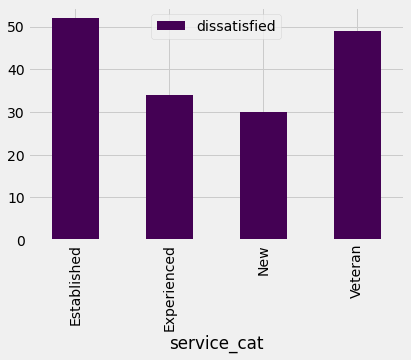

In [40]:
%matplotlib inline

import matplotlib
matplotlib.style.use('fivethirtyeight')

pivot.plot(kind='bar',colormap='viridis')

### Dissatisfaction as a Function of Employee Age

Now, we will look at employee age to answer the second question:
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The first step will be to find aggregation groups for these employees. Let's look at the ages, but first, let's handle the NaN values. Since tenure isn't very accurate at distinguishing the age of the employee, we will drop those rows.

In [41]:
combined_updated['age'].isna().sum()

55

In [42]:
combined_updated = combined_updated.dropna(subset=['age'])

Now, let's look at the types of values included.

In [43]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Since we have ranges, let's clean the columns and use the bottom of the range to get values that we can group into historgrams.

In [44]:
combined_updated['age'] = combined_updated['age'].str.extract(r'^(\d+)').astype('int')

In [45]:
combined_updated['age'].value_counts().sort_index()

20    10
21    62
26    67
31    61
36    73
41    93
46    81
51    71
56    55
61    23
Name: age, dtype: int64

Since we used 4 bins for our tenure analysis, let's use 4 bins here as well for consistency.

In [46]:
# To get our 4 bins
bins = np.linspace(20,61,5).astype('int')
bins

array([20, 30, 40, 50, 61])

In [47]:
combined_updated['bin'] = pd.cut(combined_updated['age'], bins, right=False)

In [48]:
age_pivot = np.round(combined_updated.pivot_table(index=['bin'], values='dissatisfied')*100,0)
age_pivot

,dissatisfied
bin,
"[20, 30)",35.0
"[30, 40)",36.0
"[40, 50)",38.0
"[50, 61)",40.0


<AxesSubplot:xlabel='bin'>

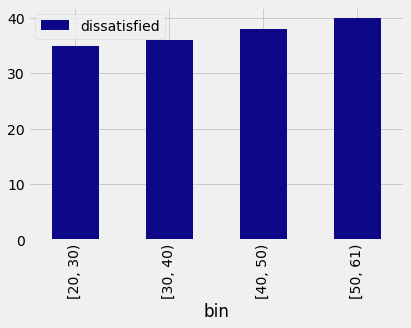

In [49]:
age_pivot.plot(kind='bar',colormap='plasma')

As we can see above, it doesn't seem like age significantly plays into dissatisfaction although it does trend upwards ~15%.

### Dissatisfaction as a Function of Survey

Now for the final look, we will see whether certain surveys had different levels of dissatisfaction.

In [50]:
survey_pivot = np.round(combined_updated.pivot_table(index=['institute'], values='dissatisfied')*100,0)
survey_pivot

,dissatisfied
institute,
DETE,49.0
TAFE,27.0


<AxesSubplot:xlabel='institute'>

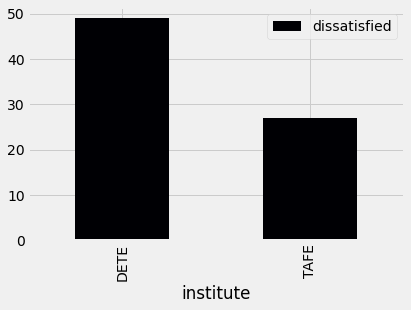

In [51]:
survey_pivot.plot(kind='bar',colormap='inferno')

As we can see above, it seems that DETE employees were significantly more dissatisfied.

## Conclusion

Through analysis, we have determined the following:
- With both institutes, longer tenure employees tended to be more dissatisfied.
- With both institutes, there seems to be a trend for older employees to be more dissatisfied regardless of tenure.
- Between the institutes, it seems that DETE employees were more dissatisfied than TAFE employees.

Further work can be done to isolate tenure and trend localized to each institute to verify that these trends for values of both institutes apply to the individual institutes and thus generate recommendations for which employee groups to focus efforts of retention on.